In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "../Downloads/QuickFacts Feb-06-2023.csv"
csv_file = pd.read_csv(path)

In [15]:
new_df = pd.DataFrame(csv_file)
new_df.head()

,Fact,Fact Note,"Seattle city, Washington","Value Note for Seattle city, Washington"
0,"Population Estimates, July 1 2022, (V2022)",NaN,NaN,NaN
1,"Population Estimates, July 1 2021, (V2021)",NaN,"733,919",NaN
2,"Population estimates base, April 1, 2020, (V2022)",NaN,NaN,NaN
3,"Population estimates base, April 1, 2020, (V2021)",NaN,"735,157",NaN
4,"Population, percent change - April 1, 2020 (es...",NaN,NaN,NaN


In [4]:
population_df = pd.DataFrame(new_df[["Fact" , "Seattle city, Washington"]])
population_df = population_df.dropna()
population_df

,Fact,"Seattle city, Washington"
1,"Population Estimates, July 1 2021, (V2021)","733,919"
3,"Population estimates base, April 1, 2020, (V2021)","735,157"
5,"Population, percent change - April 1, 2020 (es...",-0.2%
6,"Population, Census, April 1, 2020","737,015"
7,"Population, Census, April 1, 2010","608,660"
...,...,...
62,"Population per square mile, 2020","8,791.8"
63,"Population per square mile, 2010","7,250.9"
64,"Land area in square miles, 2020",83.83
65,"Land area in square miles, 2010",83.94


In [12]:
population_df["Seattle city, Washington"] = population_df["Seattle city, Washington"].replace(',',"", regex=True).replace('%',"", regex=True).replace('X',"0", regex=True).replace('$',"", regex=True).replace('""',"", regex=True)
population_df

,Fact,"Seattle city, Washington"
1,"Population Estimates, July 1 2021, (V2021)",733919
3,"Population estimates base, April 1, 2020, (V2021)",735157
5,"Population, percent change - April 1, 2020 (es...",-0.2
6,"Population, Census, April 1, 2020",737015
7,"Population, Census, April 1, 2010",608660
...,...,...
62,"Population per square mile, 2020",8791.8
63,"Population per square mile, 2010",7250.9
64,"Land area in square miles, 2020",83.83
65,"Land area in square miles, 2010",83.94


In [13]:
population_df["Seattle city, Washington"].dtypes

dtype('O')

In [14]:
pop_2020 = int(float(population_df["Seattle city, Washington"].values[3]))
pop_2021 = int(float(population_df["Seattle city, Washington"].values[1]))

pop_change = str(pop_2021 - pop_2020)
print(pop_change)

-1858


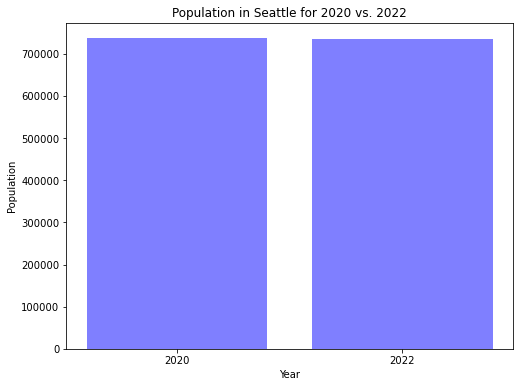

<Figure size 432x288 with 0 Axes>

In [19]:
x_axis = ["2020", "2022"]
tick_locs = [value for value in x_axis]

plt.figure(figsize=(8,6))
plt.bar(x_axis, (pop_2020, pop_2021), color='b', alpha=.5)
plt.xticks(tick_locs)
plt.title("Population in Seattle for 2020 vs. 2022")
plt.xlabel("Year")
plt.ylabel("Population")
plt.show()
plt.savefig("../Downloads/Population in 2020 vs 2022")